In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report


from scipy import stats

from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import SCORERS

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

Objective: Objective of the project to predict the target variable y whose value is yes or no. Y attributes provide information
whether the person is eligible for the credit card or. The features like age, job ,education, marital status present in 
the data which impacts the target variable. In the give data  target variable is categorical, so various classification algorithms 
has been implemented to check and find the best fit.

Statistical approach were also implemented , where the effort were put on to find the significant attributes 
from the data 

In [2]:
data = pd.read_csv('Assignment-2_Data.csv')
data.head() # checking the data 

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
data.shape # checking the shape of the data

(45211, 18)

In [4]:
data.dtypes #

Id             int64
age          float64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
y             object
dtype: object

In [5]:
data.duplicated().sum() # no rows duplicated

0

In [6]:
data.isnull().sum() # null values are present in the age and balance feature

Id           0
age          9
job          0
marital      0
education    0
default      0
balance      3
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
data.describe() # five poin summary

,Id,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45202.000000,45208.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,23606.000000,40.954714,1362.346620,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,11.539144,3044.852387,8.322476,257.527812,3.098021,100.128746,2.303441
min,1001.000000,-1.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,12303.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,23606.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,34908.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,46211.000000,999.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


The mean values and median in the data are different, it appears all the features are not following normal distribution 

In [8]:
data.select_dtypes(include=object).describe() # summary for the categorical variable

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [9]:
for col in data.select_dtypes(include=object).columns:
    print(col, data[col].nunique()) # find the count of unique values in the feautures

job 12
marital 3
education 4
default 2
housing 2
loan 2
contact 3
month 12
poutcome 4
y 2


Job and month contains 12 types of unique values, while converting these categorical variable to one hot vector
will increase the size of data, let's see if the label encoding of job and month work well.

In [10]:
for col in data.select_dtypes(include=object).columns:
    print('\n')
    print(col,'=', data[col].unique()) # checking the data details inside each attributes



job = ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


marital = ['married' 'single' 'divorced']


education = ['tertiary' 'secondary' 'unknown' 'primary']


default = ['no' 'yes']


housing = ['yes' 'no']


loan = ['no' 'yes']


contact = ['unknown' 'cellular' 'telephone']


month = ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


poutcome = ['unknown' 'failure' 'other' 'success']


y = ['no' 'yes']


In [11]:
data['y'].value_counts()/len(data) # data is not balanced

no     0.883015
yes    0.116985
Name: y, dtype: float64

Above details confirms that the value 'no' and 'yes' are not balanced in the target variable. This is a problem
of class imbalance. We will deal this issue after analysis when modeling part will be focused

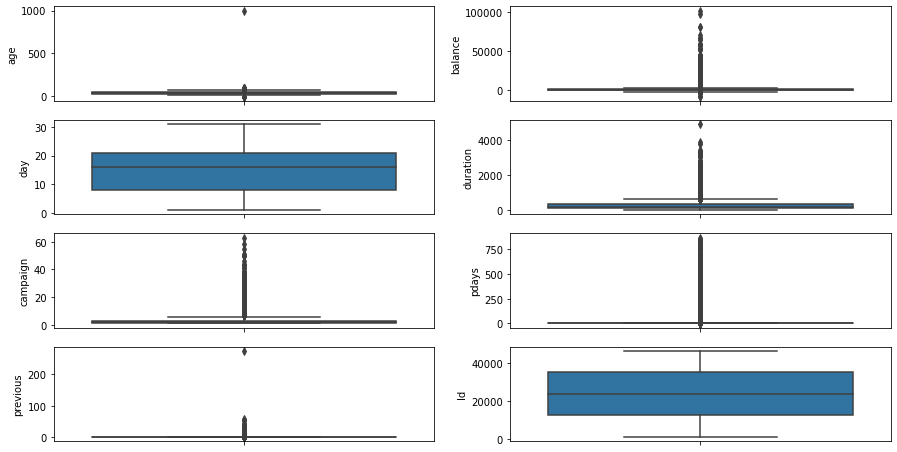

In [12]:
# box plot of nume
fig ,axes = plt.subplots(4,2,figsize=(15,8),sharex=False)
sns.boxplot(ax=axes[0][0],y = data['age'])
sns.boxplot(ax=axes[0][1],y = data['balance'])
sns.boxplot(ax=axes[1][0],y = data['day'])
sns.boxplot(ax=axes[1][1],y = data['duration'])
sns.boxplot(ax=axes[2][0],y = data['campaign'])
sns.boxplot(ax=axes[2][1],y = data['pdays'])
sns.boxplot(ax=axes[3][0],y = data['previous'])
sns.boxplot(ax=axes[3][1],y = data['Id'])
plt.show()

From above boxplot it is clear there are outliers in the age,
the data doest not appear to follow normal distribution

In [13]:
data[data['age']>100] #  age of person cannnot be 999, it is mistake, must be dealt

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no


In [14]:
data.drop(index=0, inplace=True) # dropping index with age 999 as this figure of age is not possible
data.reset_index(drop=True, inplace=True)
data.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
1,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
2,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
3,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
4,1006,35.0,management,married,tertiary,no,231.0,yes,no,unknown,5,may,139,1,-1,0,unknown,no


In [15]:
# Dealing with nll values

In [16]:
len(data)

45210

In [17]:
data.isnull().sum()

Id           0
age          9
job          0
marital      0
education    0
default      0
balance      3
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [18]:
data['age'] = data['age'].fillna(value=data['age'].median())

data['balance']=data['balance'].fillna(value=data['balance'].median())


In [19]:
try: 
    data['y'].replace({'yes':1,'no':0}, inplace=True)
except:
    pass

In [20]:
data.isnull().sum()

Id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Data analysis

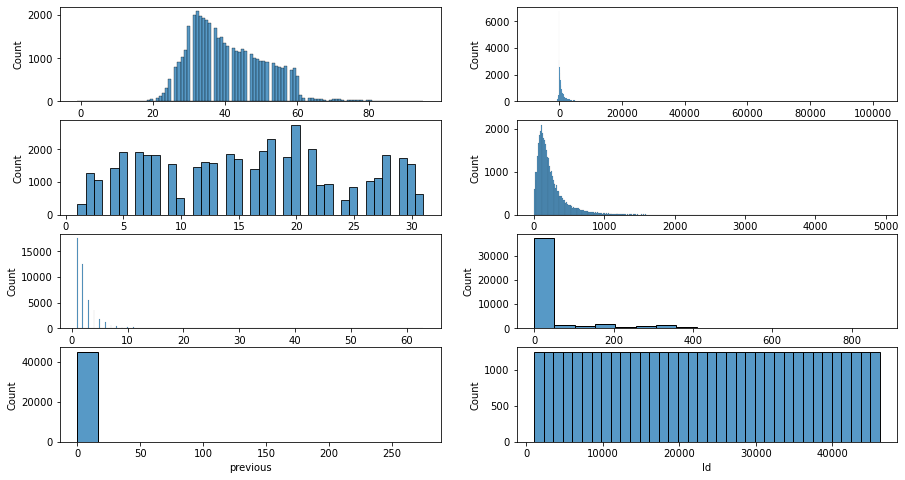

In [21]:

fig ,axes = plt.subplots(4,2,figsize=(15,8),sharex=False)
sns.histplot(ax=axes[0][0],x = data['age'])

sns.histplot(ax=axes[0][1],x = data['balance'])
sns.histplot(ax=axes[1][0],x = data['day'])
sns.histplot(ax=axes[1][1],x = data['duration'])
sns.histplot(ax=axes[2][0],x = data['campaign'])
sns.histplot(ax=axes[2][1],x = data['pdays'])
sns.histplot(ax=axes[3][0],x = data['previous'])
sns.histplot(ax=axes[3][1],x = data['Id'])
plt.show()

In [22]:
data.select_dtypes(include=object).nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
dtype: int64

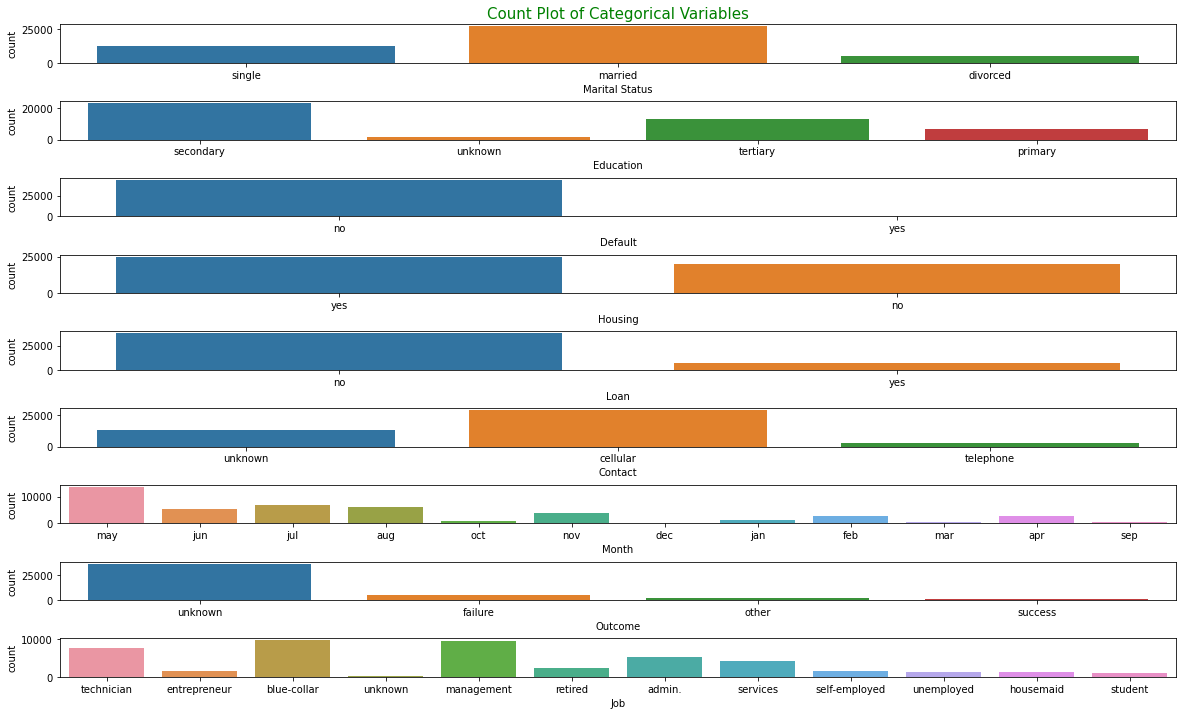

In [23]:
# countplot 
fig ,axes = plt.subplots(9,1,figsize=(20,12),sharex=False)
a1= sns.countplot(ax=axes[0],x = data['marital'])
a1.set_xlabel('Marital Status')
a1.set_title('Count Plot of Categorical Variables', fontdict={'size':15,'color':'green'})
a2 =sns.countplot(ax=axes[1],x = data['education'])
a2.set_xlabel('Education')
a3 = sns.countplot(ax=axes[2],x = data['default'])
a3.set_xlabel('Default')
a4= sns.countplot(ax=axes[3],x = data['housing'])
a4.set_xlabel('Housing')
a5 =sns.countplot(ax=axes[4],x = data['loan'])
a5.set_xlabel('Loan')
a6= sns.countplot(ax=axes[5],x = data['contact'])
a6.set_xlabel('Contact')
a7= sns.countplot(ax=axes[6],x = data['month'])
a7.set_xlabel('Month')
a8 =sns.countplot(ax=axes[7],x = data['poutcome'])
a8.set_xlabel('Outcome')
a9 = sns.countplot(ax=axes[8],x = data['job'])
a9.set_xlabel('Job')
fig.subplots_adjust(hspace=1, wspace=0.125,)
plt.show()

From the count plot it is clear that the frequencies of call categories of the attributes are not so equally balanced.
This may be the reason that model so trained will not be very good. For training the model representation of each class of the
predictor attributes should be good so that model learn  well from the data. Since, we have this data only.
We would like to go ahead with our approach. |

C:\Users\rishw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


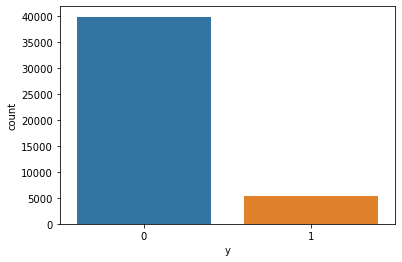

In [24]:
sns.countplot(data['y']) # count plot of target class
plt.show()
plt.show()

The traget class contains binary output where 1 means the candidate is good for the credit and zero means not good

The classes are not equally distributed. Here we need to balance the class before training the model

In [25]:
data['y'].value_counts()/len(data)*100 # data is not balanced

0    88.301261
1    11.698739
Name: y, dtype: float64

The above percentage shows that 0 (not good for credit) class is in majority containg around 88% of the data

In [26]:
def BarPlot(columnName): # function to creat the bar plot
    for col in data.select_dtypes(include=object):
        print(col)
        plt.figure(figsize=(12,4))
        sns.barplot(x=data[col], y= data[columnName],hue =data['y'])
        plt.xticks(rotation=90)
        plt.show()

job


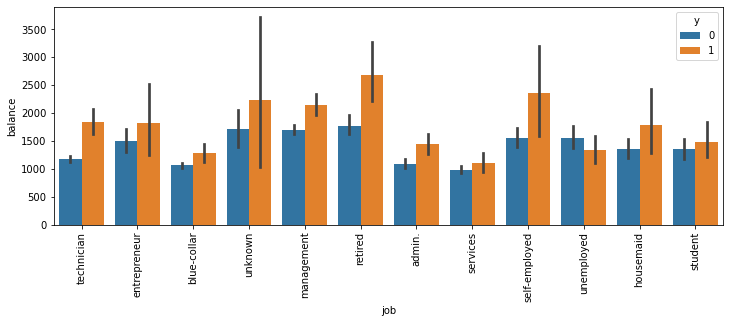

marital


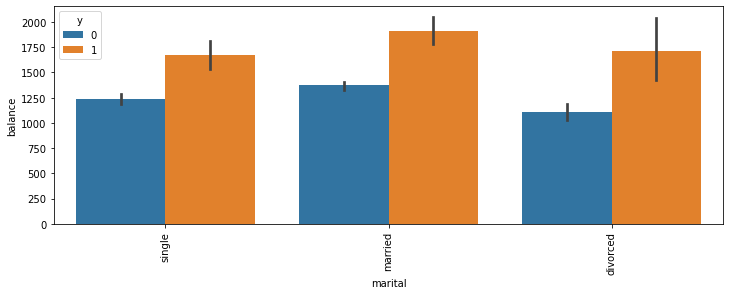

education


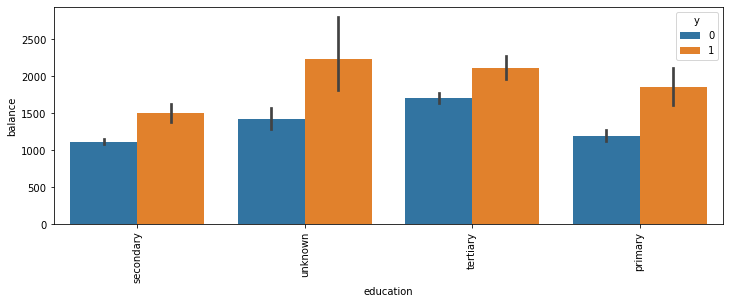

default


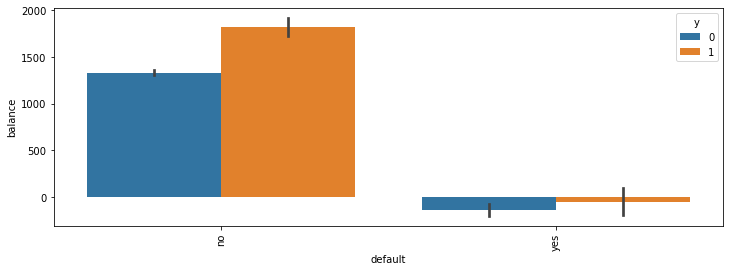

housing


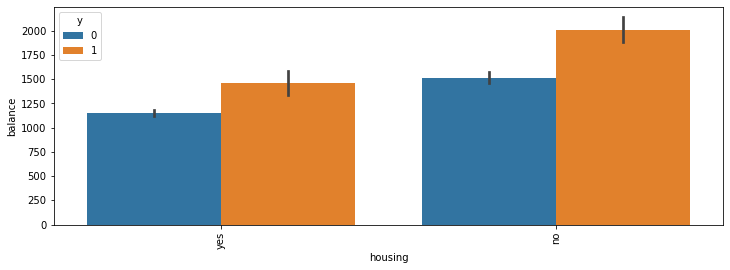

loan


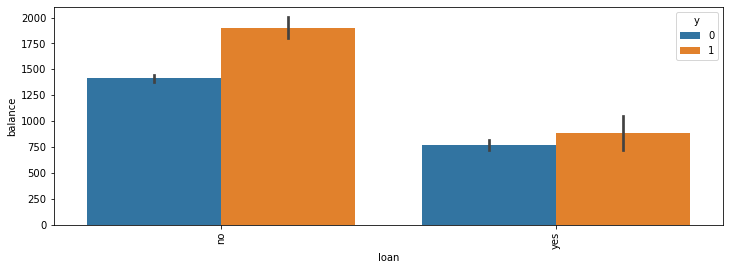

contact


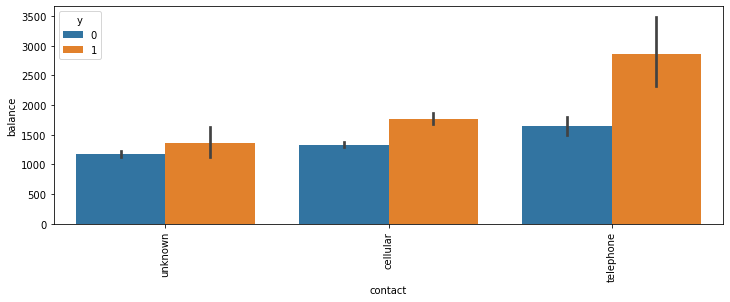

month


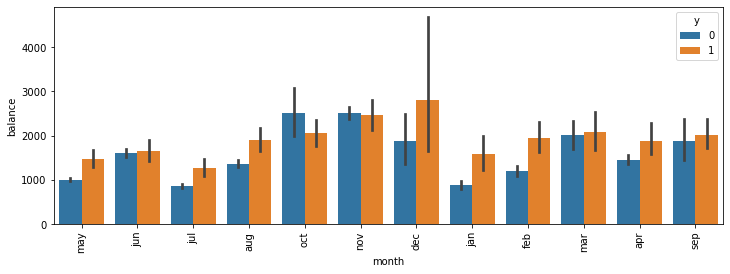

poutcome


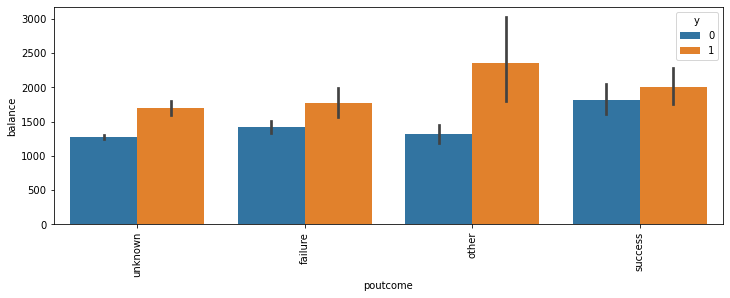

In [27]:
BarPlot('balance') # creating side bar chart with target class , balance and categorical attributes

While ploting different categorical attributes with balance attributes we can see that balance plays important role 
in differentiating the categorical variables classes

It can be seen that each class in the categorical attributes mean is different for the target class, there is a chance balance plays important role in deciding whether person is eligible for the credits

job


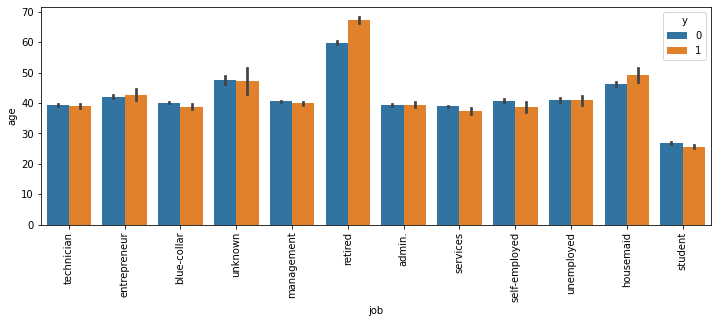

marital


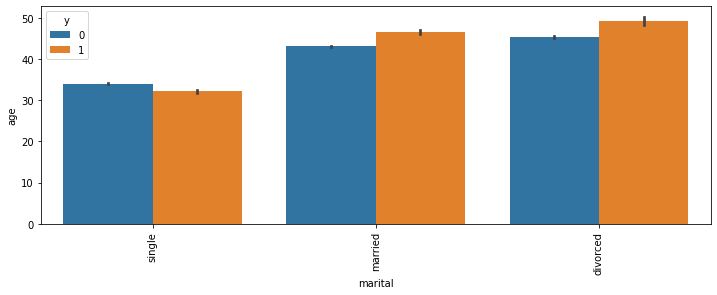

education


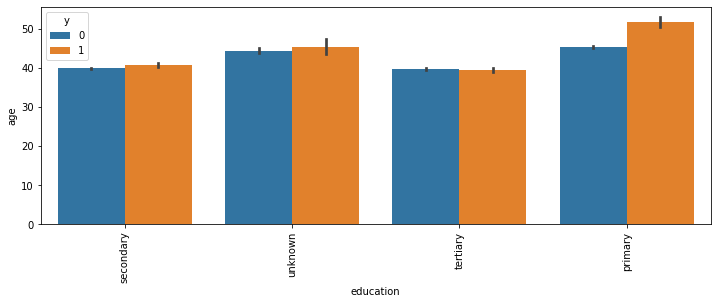

default


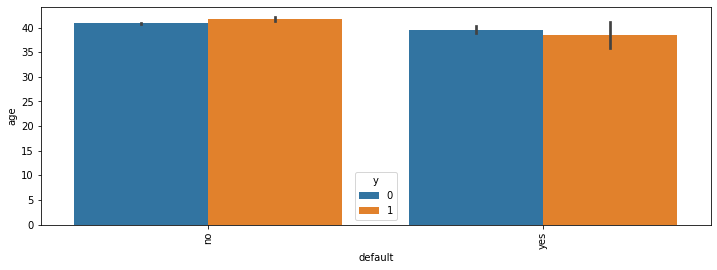

housing


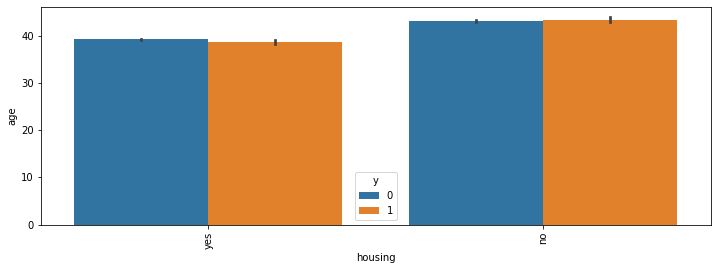

loan


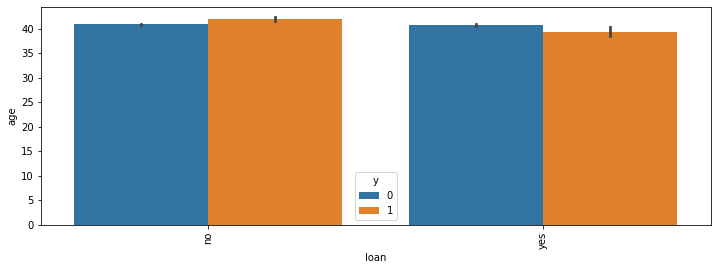

contact


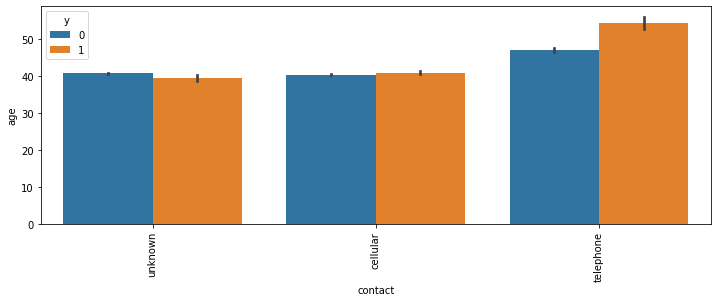

month


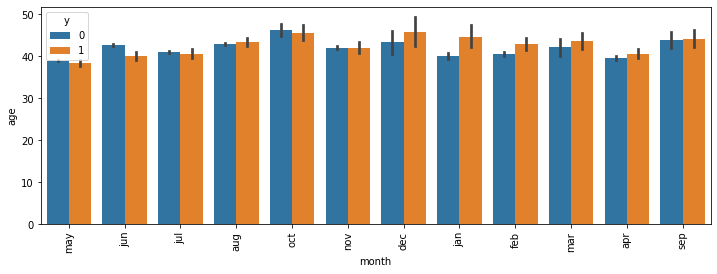

poutcome


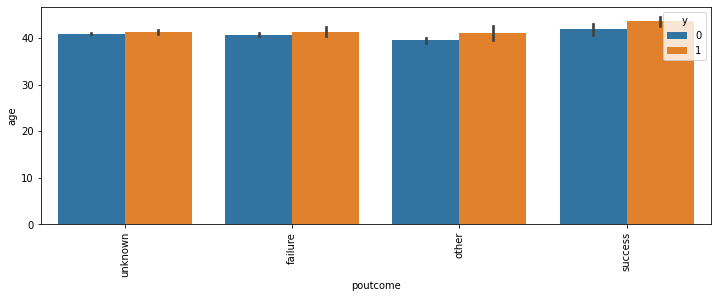

In [28]:
BarPlot('age') #creating side bar chart with target class , age and categorical attributes

From above plots it appear that target variable is not much impacted by age as the mean of both class of the target
variable appears equivalent

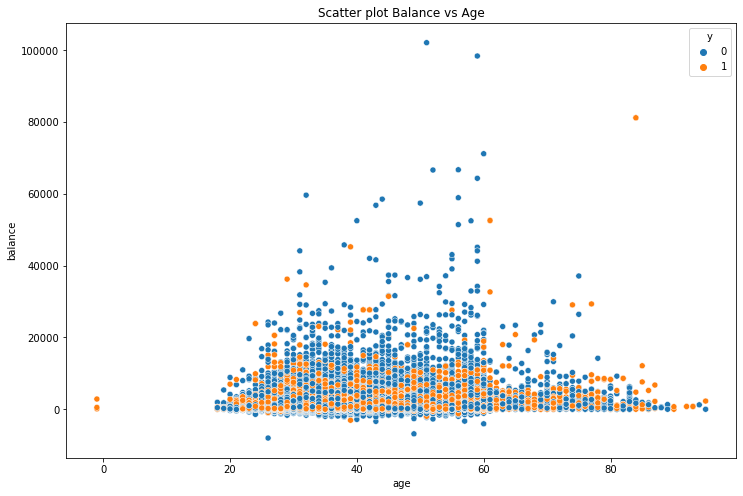

In [29]:
plt.figure(figsize=(12,8)) # balance
plt.title('Scatter plot Balance vs Age')
sns.scatterplot(x=data['age'],y=data['balance'], hue=data['y'])
plt.show()

There appear trend that with age balance increases, but it is not so strong as there people with mediocre age
having high as well low balance

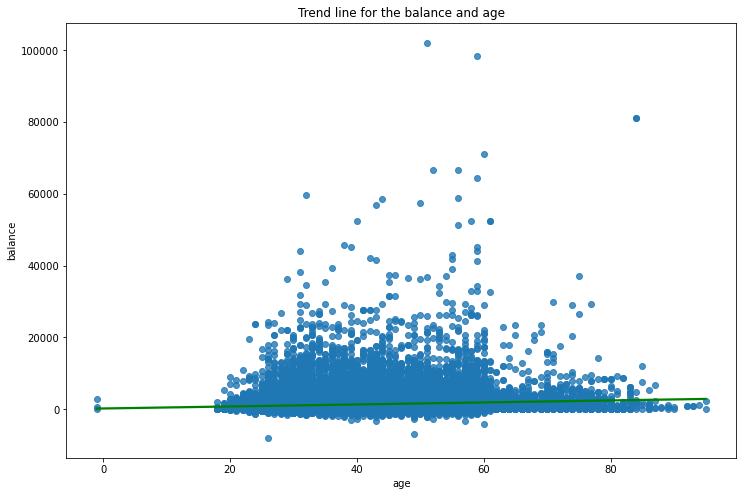

In [30]:
plt.figure(figsize=(12,8))
plt.title("Trend line for the balance and age")
sns.regplot(x=data['age'],y=data['balance'],line_kws={'color':'green'})
plt.show()

The trend lines shows that with age balance increase, but the slope of line is very less 

### Statistical test for the balance and the age

In [31]:
data.shape

(45210, 18)

In [32]:
data['balance'].sample(n=4500, random_state=10)

4393      228.0
4438     3750.0
26378    2289.0
42133    5871.0
2667      452.0
          ...  
35749     265.0
37219       0.0
25799       0.0
34018     477.0
1222       20.0
Name: balance, Length: 4500, dtype: float64

In [33]:
balance = data['balance'].sample(n=4500, random_state=10) # randomly getting 4500 records for shapiro test 
age = data['age'].sample(n=4500, random_state=10)  # randomly checking 
print(stats.shapiro(balance))
print('age', stats.shapiro(age))

ShapiroResult(statistic=0.4770895838737488, pvalue=0.0)
age ShapiroResult(statistic=0.9597294926643372, pvalue=1.3011298095057312e-33)


Balance and Age are not normal 
Going for spearman r non parametric test

In [34]:
stats.spearmanr(data['balance'], data['age'])
# significantly balance and age are correlated but the strenght of linear relationship is not so good it is only 0.096

SpearmanrResult(correlation=0.09622475498659533, pvalue=1.8660182304796786e-93)

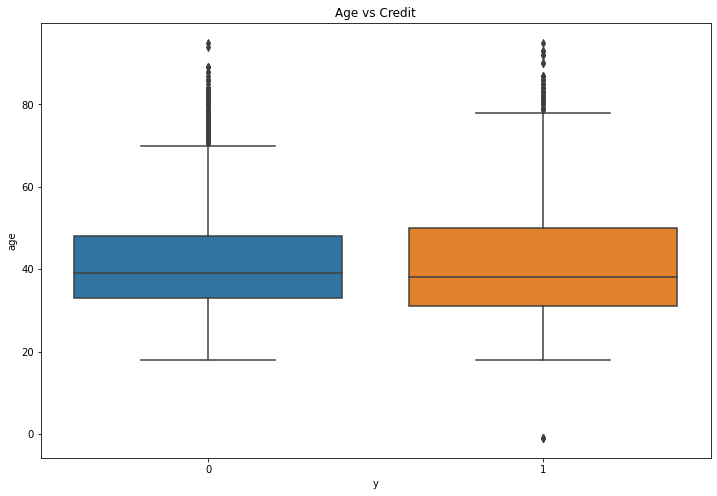

In [35]:
plt.figure(figsize=(12,8))
plt.title("Age vs Credit")
sns.boxplot(y=data['age'],x=data['y'])
plt.show()

The distribution is not normal for both the age and credit , there is mild difference in the mean 

It can be noticed from the graph that high age lies in both classes , so we conclude high balance does not neccessarily 
means the person is eligible for the credit

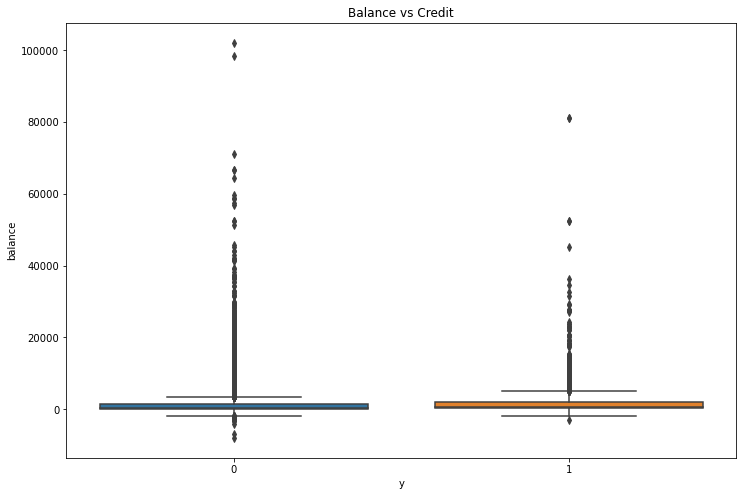

In [36]:
plt.figure(figsize=(12,8))
plt.title("Balance vs Credit")
sns.boxplot(y=data['balance'],x=data['y'])
plt.show()

Similarly,it can be noticed from the graph that high age lies in both classes , so we conclude high balance does not neccessarily 
means the person is eligible for the credit

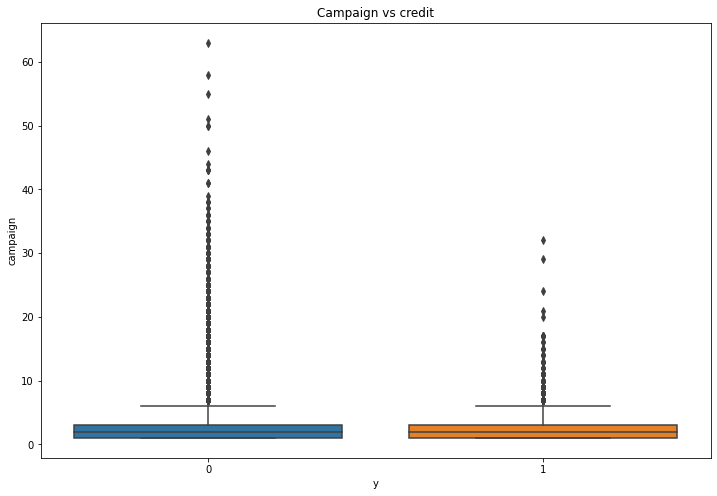

In [37]:
plt.figure(figsize=(12,8))
plt.title('Campaign vs credit')
sns.boxplot(y=data['campaign'],x=data['y'])
plt.show()

From above graph it is clear that when campaign days are more than 40 it will definitely lie under not eligible class for the credit

In [38]:
data.drop(columns=['y','Id'],axis =1).corr() # correlation matrix

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097704,-0.009114,-0.004809,0.004906,-0.023695,0.000826
balance,0.097704,1.000000,0.004504,0.021561,-0.014578,0.003436,0.016674
day,-0.009114,0.004504,1.000000,-0.030207,0.162477,-0.093058,-0.051719
duration,-0.004809,0.021561,-0.030207,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004906,-0.014578,0.162477,-0.084570,1.000000,-0.088633,-0.032859
pdays,-0.023695,0.003436,-0.093058,-0.001565,-0.088633,1.000000,0.454819
previous,0.000826,0.016674,-0.051719,0.001203,-0.032859,0.454819,1.000000


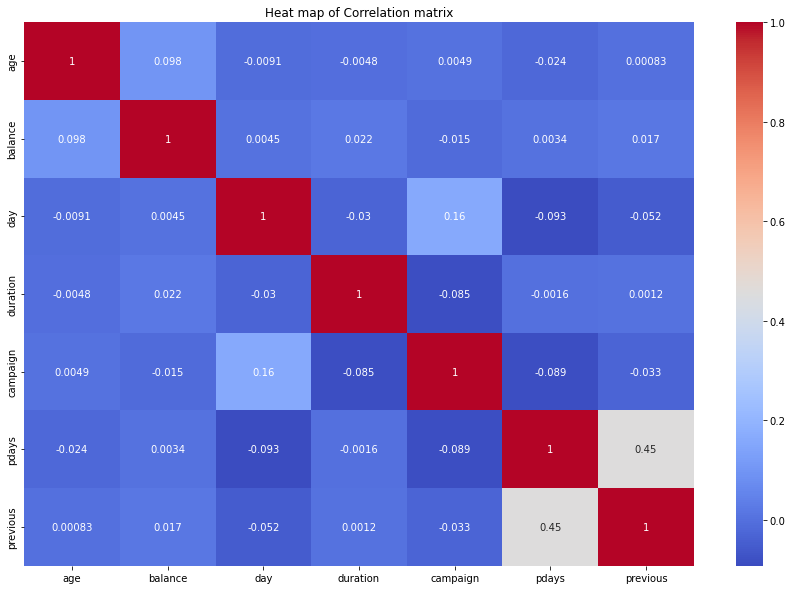

In [39]:
plt.figure(figsize=(15,10)) 
plt.title("Heat map of Correlation matrix")
sns.heatmap(data.drop(columns=['y','Id'],axis =1).corr(), annot=True, cmap='coolwarm')
plt.show()

From above it is clear that multicollinearity is very less in the data, only previous and pdays attributes show medium and positive correlation. This is a good sign, to build good model the multicollinearity should be negligible in the data

# Modelling

In [40]:
dataModel = data.copy() # making copy of the data 

In [41]:
dataModel.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,0
1,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
2,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,0
3,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,0
4,1006,35.0,management,married,tertiary,no,231.0,yes,no,unknown,5,may,139,1,-1,0,unknown,0


In [47]:
# creating list of categorical variables
cat_columns = dataModel.select_dtypes(include=object).columns # categorical attributes
cat_columns_one_hot = ['marital','education','default','housing','loan','contact','poutcome'] # attributes for one hot encoding
cat_columns_label_encoder = ['job','month'] # taking thesse variables for label encoder

# applying label encoder
Label_Encoder_month = LabelEncoder()
Label_Encoder_job = LabelEncoder()
dataModel['month'] = Label_Encoder_month.fit_transform(dataModel['month'])
dataModel['job'] = Label_Encoder_job.fit_transform(dataModel['job'])

# creating list of numerical variables for the transformation
num_list = list(data.select_dtypes(exclude=object).drop(['Id','y'],axis=1).columns)

# applying one hot encoding
OHencoder = OneHotEncoder(sparse=False)
X_one_hot_encoder = OHencoder.fit_transform(data[cat_columns_one_hot])

# creating data frame of one hot encoded matrix
df_one_hot_encoder = pd.DataFrame(X_one_hot_encoder, columns=OHencoder.get_feature_names_out())

# dropping categorical attributes from the data as these are encoded
try:
    dataModel.drop(columns = cat_columns_one_hot, axis =1 ,inplace=True)
except:
    pass
# dropping id as it is not required
try:
    dataModel.drop(columns='Id',axis=1, inplace=True)
except:
    pass

# conversion of numerical attributes using standard scaler
Standard_Scaler = StandardScaler()
X_array= Standard_Scaler.fit_transform(dataModel[num_list])
# creating data frame for the transformed numerical columns
X_scaled_num = pd.DataFrame(X_array,columns=Standard_Scaler.get_feature_names_out() )
X_scaled_num.head()

# replacing data with the transformed column
for col in X_scaled_num.columns:
    dataModel[col] = X_scaled_num[col]

# mergind two data frame
df_merged = pd.merge(dataModel,df_one_hot_encoder,left_index=True, right_index=True)

# seperating predictor and response variables from the data
y = df_merged['y']
X = df_merged.drop(columns='y',axis =1)

# adding constant to the data to build stats model
X = sm.add_constant(X)

In [48]:
X.head() # demo of data

,const,age,job,balance,day,month,duration,campaign,pdays,previous,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.0,0.288732,9,-0.437890,-1.298515,8,-0.416122,-0.569359,-0.411458,-0.251943,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,-0.746869,2,-0.446758,-1.298515,8,-0.707353,-0.569359,-0.411458,-0.251943,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.571168,1,0.047206,-1.298515,8,-0.645224,-0.569359,-0.411458,-0.251943,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,-0.746869,11,-0.447086,-1.298515,8,-0.233618,-0.569359,-0.411458,-0.251943,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,-0.558578,4,-0.371546,-1.298515,8,-0.462719,-0.569359,-0.411458,-0.251943,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [51]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.2, random_state=42) # splitting the data in ratio 80:20

print("X_train's shape",X_train.shape)
print("X test's shape'",X_test.shape)
print("y_train's shape",y_train.shape)
print("y_test's shape",y_test.shape)

X_train's shape (36168, 30)
X test's shape' (9042, 30)
y_train's shape (36168,)
y_test's shape (9042,)


In [55]:
# Building logistic model 
model_logistic = LogisticRegression(max_iter=500)
model_logistic.fit(X_train, y_train)
print('Logistic Regression Model')
print('test score',model_logistic.score(X_test, y_test))
print('train score',model_logistic.score(X_train, y_train))
# above model shows that the difference between train and test model is small
print("\n Target classes percentage")
print(data['y'].value_counts()/len(data))

Logistic Regression Model
test score 0.898363193983632
train score 0.9014598540145985

 Target classes percentage
0    0.883013
1    0.116987
Name: y, dtype: float64


Model evaluation: The model that built shows accuray of 89 % while the representation of one class itself is 
88.3% we can say that model is learning something but need to improve further

In [56]:
logreg = sm.Logit(y, X, check_rank=True).fit()
print(logreg.summary())
print(logreg.aic)

         Current function value: 0.251618
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                45210
Model:                          Logit   Df Residuals:                    45187
Method:                           MLE   Df Model:                           22
Date:                Fri, 14 Apr 2023   Pseudo R-squ.:                  0.3028
Time:                        10:26:34   Log-Likelihood:                -11376.
converged:                      False   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.6805   1.02e+06  -6.64e-07      1.000   -2.01e+06    2.01e+06
age                     0.0646      0.

C:\Users\rishw\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


From above p value of of the model is zero which conveys that model is significant

The p value of the attributes like job, pdays and previous is more than 0.05, these attributes are not significant in the model

However, the pseudo r2 square value of the model is 0.30, it means the model can explained only 30percet of the 
variance in the target variable. Let's see if this model can be improved further

In [57]:
logreg = sm.Logit(y, X.drop(columns=['job','pdays','previous'],axis =1), check_rank=True).fit()
print(logreg.summary())
print(logreg.aic)

Optimization terminated successfully.
         Current function value: 0.251657
         Iterations 17
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                45210
Model:                          Logit   Df Residuals:                    45190
Method:                           MLE   Df Model:                           19
Date:                Fri, 14 Apr 2023   Pseudo R-squ.:                  0.3027
Time:                        10:26:35   Log-Likelihood:                -11377.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.6665   7.66e+05   -8.7e-07      1.000    -1.5e+06     1.5e+06
a

After removing the insignificant variables that AIC value has beend dropped, this is a good sign

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:

  
# calculating VIF for each feature
vif = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif)

C:\Users\rishw\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\rishw\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[0.0, 1.3813371914133867, 1.069644444905442, 1.0367239268692863, 1.0405563293915552, 1.25851243269085, 1.0114948200812195, 1.0631607054496972, 4.486074109430453, 1.412759597461706, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]


In [60]:
pd.DataFrame(vif,index = X.columns,columns=['vifScore']).sort_values(by='vifScore',ascending=False)

,vifScore
education_tertiary,inf
education_unknown,inf
poutcome_success,inf
poutcome_other,inf
poutcome_failure,inf
contact_unknown,inf
contact_telephone,inf
contact_cellular,inf
loan_yes,inf
loan_no,inf


# Approach1

In [61]:
df_merged.head()

,age,job,balance,day,month,duration,campaign,pdays,previous,y,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.288732,9,-0.437890,-1.298515,8,-0.416122,-0.569359,-0.411458,-0.251943,0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.746869,2,-0.446758,-1.298515,8,-0.707353,-0.569359,-0.411458,-0.251943,0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.571168,1,0.047206,-1.298515,8,-0.645224,-0.569359,-0.411458,-0.251943,0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.746869,11,-0.447086,-1.298515,8,-0.233618,-0.569359,-0.411458,-0.251943,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-0.558578,4,-0.371546,-1.298515,8,-0.462719,-0.569359,-0.411458,-0.251943,0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [62]:
num_list

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [63]:
def OutlierRemoval(col, data): # function to remove outliers, it returns boolean vector
        Q1 = np.percentile(data[col], 25,
                           interpolation = 'midpoint')

        Q3 = np.percentile(data[col], 75,
                           interpolation = 'midpoint')
        IQR = Q3 - Q1

        # Upper bound
        upper=Q3+2*IQR
        upper_array=np.array(data[col]>=upper)
        # Lower bound
        lower=Q1-2*IQR
        lower_array=np.array(data[col]<=lower)
        boolean = list(map(lambda x,y:  False if (x== True or y == True) else True, upper_array, lower_array))
        return boolean

In [66]:
toTrain =df_merged.copy() # copying the scaled and converted data
for col in ['age',
 'job',
 'balance',
 'day',
 'month',
 'duration']:
    toTrain = toTrain[OutlierRemoval(col,toTrain)]
    print(col, toTrain.shape)

age (45022, 30)
job (45022, 30)
balance (41293, 30)
day (41293, 30)
month (41293, 30)
duration (39239, 30)


In [67]:
toTrain['y'].value_counts()/len(toTrain) # checking balancing of the data 

0    0.910064
1    0.089936
Name: y, dtype: float64

In [72]:

X= toTrain.drop('y',axis =1)
y = toTrain['y']
under = RandomUnderSampler(sampling_strategy=0.5) # applying undersampling technique to balance the target classes
X, y = under.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(  X, y, 
                                        test_size=0.2, random_state=42) # splitting the data in ratio 80:20

print("X_train's shape",X_train.shape)
print("X test's shape'",X_test.shape)
print("y_train's shape",y_train.shape)
print("y_test's shape",y_test.shape)

print('class representation in training data after undersampling',y_train.value_counts()/len(y_train))
print('class representation in training data after undersampling',y_test.value_counts()/len(y_test))

X_train's shape (8469, 29)
X test's shape' (2118, 29)
y_train's shape (8469,)
y_test's shape (2118,)
class representation in training data after undersampling 0    0.666903
1    0.333097
Name: y, dtype: float64
class representation in training data after undersampling 0    0.665722
1    0.334278
Name: y, dtype: float64


In [73]:
# Building logistic model 
model_logistic = LogisticRegression(max_iter=500)
model_logistic.fit(X_train, y_train)
print('Logistic Regression Model')
print('test score',model_logistic.score(X_test, y_test))
print('train score',model_logistic.score(X_train, y_train))
print('test classification',metrics.classification_report(y_test,model_logistic.predict(X_test),digits=5))
print('train classification',metrics.classification_report(y_train, model_logistic.predict(X_train),digits=5))

Logistic Regression Model
test score 0.8144475920679887
train score 0.8180422718148542
test classification               precision    recall  f1-score   support

           0    0.84428   0.88440   0.86387      1410
           1    0.74571   0.67514   0.70867       708

    accuracy                        0.81445      2118
   macro avg    0.79499   0.77977   0.78627      2118
weighted avg    0.81133   0.81445   0.81199      2118

train classification               precision    recall  f1-score   support

           0    0.83937   0.89926   0.86828      5648
           1    0.76468   0.65544   0.70586      2821

    accuracy                        0.81804      8469
   macro avg    0.80202   0.77735   0.78707      8469
weighted avg    0.81449   0.81804   0.81418      8469



In [74]:
logreg = sm.Logit(y, X.drop(columns=['job','pdays','previous'],axis =1), check_rank=True).fit()
print(logreg.summary())
print(logreg.aic)

         Current function value: 0.395147
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                10587
Model:                          Logit   Df Residuals:                    10567
Method:                           MLE   Df Model:                           19
Date:                Fri, 14 Apr 2023   Pseudo R-squ.:                  0.3792
Time:                        10:33:52   Log-Likelihood:                -4183.4
converged:                      False   LL-Null:                       -6738.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                     0.0649      0.031      2.109      0.035       0.005       0.125
balance                 0.5620      0.

C:\Users\rishw\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Applying smote to generate data synthetically in order to balance the classes

In [75]:
# removing job, pdays and previous featues as these are not significant features (known from the wald' test)
X= toTrain.drop(['job','pdays','previous','y'],axis =1)
y = toTrain['y']
smote = SMOTE(random_state=42) # over sampling technique
X, y = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(  X, y, 
                                        test_size=0.2, random_state=42) # splitting the data in ratio 80:20

print("X_train's shape",X_train.shape)
print("X test's shape'",X_test.shape)
print("y_train's shape",y_train.shape)
print("y_test's shape",y_test.shape)

print('train value count for the target variables',y_train.value_counts()/len(y_train))
print('test value count for the target variables',y_test.value_counts()/len(y_test))

# Building logistic model 
model_logistic = LogisticRegression(max_iter=500)
model_logistic.fit(X_train, y_train)
print('Logistic Regression Model')
print('test score',model_logistic.score(X_test, y_test))
print('train score',model_logistic.score(X_train, y_train))
print('test classification',metrics.classification_report(y_test,model_logistic.predict(X_test),digits=5))
print('train classification',metrics.classification_report(y_train, model_logistic.predict(X_train),digits=5))

X_train's shape (57136, 26)
X test's shape' (14284, 26)
y_train's shape (57136,)
y_test's shape (14284,)
train value count for the target variables 1    0.500525
0    0.499475
Name: y, dtype: float64
test value count for the target variables 0    0.5021
1    0.4979
Name: y, dtype: float64
Logistic Regression Model
test score 0.8186082329879586
train score 0.8226337160459255
test classification               precision    recall  f1-score   support

           0    0.82048   0.81762   0.81905      7172
           1    0.81673   0.81960   0.81816      7112

    accuracy                        0.81861     14284
   macro avg    0.81861   0.81861   0.81861     14284
weighted avg    0.81861   0.81861   0.81861     14284

train classification               precision    recall  f1-score   support

           0    0.82261   0.82220   0.82240     28538
           1    0.82266   0.82306   0.82286     28598

    accuracy                        0.82263     57136
   macro avg    0.82263   0.82263   0

# Approach2

In [81]:
dataModel2 = data.copy()
try:
    dataModel2.drop(columns =['Id'],axis =1 , inplace=True)
except:
    pass
dataModel2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,0
1,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
2,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,0
3,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,0
4,35.0,management,married,tertiary,no,231.0,yes,no,unknown,5,may,139,1,-1,0,unknown,0


In [85]:
def Processing(data):
    # remove id columns as it it not required
    y = data['y']
    try:
        data.drop(columns =['Id','y'],axis =1 , inplace=True)
    except:
        pass

    #print(data.columns)
    # getting column names for the 
    num_col = list(data.select_dtypes(exclude=object).columns)
    cat_col = list(list(data.select_dtypes(include=object).columns))
    # numerica column transformation
    scaler =MinMaxScaler()
    X_scaled = scaler.fit_transform(data[num_col])
    df_scaled_num = pd.DataFrame(X_scaled, columns= scaler.get_feature_names_out())
    
    # cat_col transformation
    oneHOtTransformer = OneHotEncoder(drop='first',sparse=False)
    X_cat = oneHOtTransformer.fit_transform(data[cat_col])
    df_cat = pd.DataFrame(X_cat, columns= oneHOtTransformer.get_feature_names_out())
    # concat numerical and categorical columns
    df_combine = pd.concat( [df_scaled_num,df_cat],axis =1)
    # deleting some variables to free the cache memory as there variable will not be used be further
    del num_col, cat_col, X_scaled, df_scaled_num, df_cat, X_cat
    return (df_combine, y) # return X data Frame and target variable as tuple

In [86]:
X2,y2= Processing(dataModel2)

In [87]:
try :
    X2.drop('y', axis=1,inplace =True)
except:
    pass

In [94]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
...     X2, y2, test_size=0.33, random_state=42)

model_logistic = LogisticRegression(max_iter= 500)
model_logistic.fit(X_train2,y_train2)


print('Logistic regression without class balance',
      'train score:',model_logistic.score(X_train2, y_train2),'test score:', model_logistic.score(X_test2,y_test2))

prediction = model_logistic.predict(X_test2)
print(classification_report(prediction, y_test2,digits=5))

Logistic regression without class balance train score: 0.902542093100033 test score: 0.8989276139410187
              precision    recall  f1-score   support

           0    0.97778   0.91353   0.94456     14063
           1    0.31724   0.65928   0.42835       857

    accuracy                        0.89893     14920
   macro avg    0.64751   0.78640   0.68646     14920
weighted avg    0.93983   0.89893   0.91491     14920



# Finding significant variables

In [ ]:
from scipy import stats

In [95]:
for col in data.select_dtypes(include=object):
    print(col)

job
marital
education
default
housing
loan
contact
month
poutcome


In [96]:
# Hypothesis for the chi square association test 
# ho: There is no association
# H1: There is a association 

list_associated=[]
for col in data.select_dtypes(include=object):
    print(col)
    pd.crosstab(index = data['y'],columns=data[col])
    print(pd.crosstab(index = data['y'],columns=data[col]))
    # from above it is cleart that  none frequency is less than 5
    # it means we can apply chi-square test to check weather predictor categorial variables are associated with target variables or not

job
job  admin.  blue-collar  entrepreneur  housemaid  management  retired  \
y                                                                        
0      4540         9024          1364       1131        8156     1748   
1       631          708           123        109        1301      516   

job  self-employed  services  student  technician  unemployed  unknown  
y                                                                       
0             1392      3785      669        6757        1101      254  
1              187       369      269         840         202       34  
marital
marital  divorced  married  single
y                                 
0            4585    24458   10878
1             622     2755    1912
education
education  primary  secondary  tertiary  unknown
y                                               
0             6260      20752     11304     1605
1              591       2450      1996      252
default
default     no  yes
y                  
0    

In [97]:
# Hypothesis for the chisquare test 
# H0: There is no association between predictor and target variable
#H0: There is association between predictor and target variable
significant_categorical = []
not_significant_categorical = []
for col in data.select_dtypes(include=object):
    print(col)
    toTest = pd.crosstab(index = data['y'],columns=data[col])
    result = stats.chi2_contingency(toTest)
    if result[1]<=0.05:
        significant_categorical.append(col)
        print(col,result[1])
    else:
        not_significant_categorical.append(col)
print('important',significant_categorical)
print('not important', not_significant_categorical)

job
job 3.2803974785024804e-172
marital
marital 2.185198674532852e-43
education
education 1.562399673920906e-51
default
default 2.451601106314752e-06
housing
housing 3.0561190942330133e-192
loan
loan 1.6496460928175662e-47
contact
contact 1.3400284768797248e-225
month
month 0.0
poutcome
poutcome 0.0
important ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
not important []


 p value of all the variables are almost zero , so reject null hypothesis, it means features like  job, marital status,
education, defualt, housing and loan are all important

In [ ]:
# all categorical variables are significant

In [99]:
estimator = LogisticRegression(max_iter=500) # applying logistic regression with Recursive feature elimination
selector = RFE(estimator, n_features_to_select=None, step=1)
selector = selector.fit(X_train2, y_train2)
selected_columns = list(selector.get_feature_names_out())
model_logistic = LogisticRegression(max_iter= 500)
model_logistic.fit(X_train2[selected_columns],y_train2)
print(model_logistic.score(X_train2[selected_columns], y_train2),
      model_logistic.score(X_test2[selected_columns],y_test2))

prediction = model_logistic.predict(X_test2[selected_columns])
print(classification_report(prediction, y_test2,digits=5))

0.9027731924727633 0.899597855227882
              precision    recall  f1-score   support

           0    0.97778   0.91418   0.94491     14053
           1    0.32285   0.66321   0.43429       867

    accuracy                        0.89960     14920
   macro avg    0.65031   0.78869   0.68960     14920
weighted avg    0.93972   0.89960   0.91524     14920



### Applying different algorithms

In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC

In [102]:
from xgboost import XGBClassifier

In [103]:
def ClassifierApplier(list_classifier): # [(name, classifier)]
    for model in list_classifier:
        print(f"model name: {model[0]}")
        classifier = model[1]
        try:
            selector = RFE(classifier, n_features_to_select=5, step=1)
            selector = selector.fit(X_train2, y_train2)
            selected_columns = list(selector.get_feature_names_out())
        except:
            selected_columns = list(X_train2.columns)

        classifier.fit(X_train2[selected_columns],y_train2)
        print(classifier.score(X_train2[selected_columns], y_train2),
              classifier.score(X_test2[selected_columns],y_test2))

        prediction = classifier.predict(X_test2[selected_columns])
        print(classification_report(prediction, y_test2,digits=5))
        print()

In [104]:
model_list =[('log',LogisticRegression(max_iter=500)),
              ('dt',DecisionTreeClassifier()),
            ('knn',KNeighborsClassifier()),
            ('SVC',SVC()),
             ('Gnb',GaussianNB()),
            ('Bnb',BernoulliNB())]

In [105]:
ClassifierApplier(model_list)

model name: log
0.9014526246285903 0.8981903485254692
              precision    recall  f1-score   support

           0    0.97892   0.91194   0.94424     14104
           1    0.30264   0.66054   0.41509       816

    accuracy                        0.89819     14920
   macro avg    0.64078   0.78624   0.67967     14920
weighted avg    0.94193   0.89819   0.91530     14920


model name: dt
1.0 0.8455093833780161
              precision    recall  f1-score   support

           0    0.90715   0.91656   0.91183     13004
           1    0.39079   0.36326   0.37652      1916

    accuracy                        0.84551     14920
   macro avg    0.64897   0.63991   0.64418     14920
weighted avg    0.84084   0.84551   0.84309     14920


model name: knn
0.9128755364806866 0.8872654155495978
              precision    recall  f1-score   support

           0    0.97625   0.90350   0.93847     14197
           1    0.23077   0.56846   0.32827       723

    accuracy                      

C:\Users\rishw\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
C:\Users\rishw\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
C:\Users\rishw\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
C:\Users\rishw\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
C:\Users\rishw\anaconda3\lib\site-packages\sklearn\utils\deprecation

0.8841862000660284 0.8806300268096515
              precision    recall  f1-score   support

           0    1.00000   0.88063   0.93653     14920
           1    0.00000   0.00000   0.00000         0

    accuracy                        0.88063     14920
   macro avg    0.50000   0.44032   0.46826     14920
weighted avg    1.00000   0.88063   0.93653     14920




C:\Users\rishw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [106]:
model_list_ensemble = [("RF",RandomForestClassifier()),
                      ('Ada',AdaBoostClassifier()),
                      ('Grad',GradientBoostingClassifier()),
                      ("XGB",XGBClassifier())]

In [107]:
# apply ensemble model
ClassifierApplier(model_list_ensemble)

model name: RF
0.9999339716077914 0.8926943699731903
              precision    recall  f1-score   support

           0    0.96430   0.91798   0.94057     13802
           1    0.36440   0.58050   0.44774      1118

    accuracy                        0.89269     14920
   macro avg    0.66435   0.74924   0.69416     14920
weighted avg    0.91935   0.89269   0.90364     14920


model name: Ada
0.90244305051172 0.8973190348525469
              precision    recall  f1-score   support

           0    0.97648   0.91297   0.94366     14053
           1    0.31331   0.64360   0.42145       867

    accuracy                        0.89732     14920
   macro avg    0.64489   0.77829   0.68256     14920
weighted avg    0.93795   0.89732   0.91331     14920


model name: Grad
0.9087157477715417 0.8991286863270778
              precision    recall  f1-score   support

           0    0.97100   0.91903   0.94430     13882
           1    0.36889   0.63295   0.46612      1038

    accuracy        

C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\rishw\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:00:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8940574447012215 0.8909517426273459
              precision    recall  f1-score   support

           0    0.98645   0.89944   0.94094     14410
           1    0.18641   0.65098   0.28983       510

    accuracy                        0.89095     14920
   macro avg    0.58643   0.77521   0.61539     14920
weighted avg    0.95911   0.89095   0.91869     14920




In [108]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train2,y_train2)
print(classifier.score(X_train2, y_train2),
      classifier.score(X_test2,y_test2))

prediction = classifier.predict(X_test2)
print(classification_report(prediction, y_test2,digits=5))
print()

1.0 0.8689678284182306
              precision    recall  f1-score   support

           0    0.92130   0.92930   0.92528     13026
           1    0.48287   0.45407   0.46803      1894

    accuracy                        0.86897     14920
   macro avg    0.70209   0.69168   0.69665     14920
weighted avg    0.86565   0.86897   0.86724     14920




['balance', 'duration', 'campaign', 'previous', 'job_retired',
       'job_student', 'marital_married', 'housing_yes', 'loan_yes',
       'contact_unknown', 'month_aug', 'month_dec', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_success'], dtype=object)


no algorithms is doing better here even the the boosting and bagging technique not able to peform better , the classes here are
imbalance due to which algorithms is able to predict  0 class better but lagging in correct prediction of class 1

Solution: Train the model by balancing the classes using smote tehcnique, next approach include undersampling and oversampling
. The data will be generated synthetically here to train the model when the oversampling techinque will be implemented. In actual scenario we need to take the real data from the source or need to verify the synthetic data before using for the training, since it is not possible for us to follow these steps as we are not domain experts and we have this limited data only with us. We would go ahead with our approach to generate data synthetically without any data verification process.

## Approach 3 (Balancing the data only no outlier treatment)

In [111]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [112]:
sm = SMOTE(random_state=42)
X_train2_smote, y_train2_smote = sm.fit_resample(X_train2, y_train2)

In [113]:
y_train2_smote.value_counts()

0    26782
1    26782
Name: y, dtype: int64

In [114]:
model_logistic = LogisticRegression(max_iter= 500)
model_logistic.fit(X_train2_smote,y_train2_smote)
print(model_logistic.score(X_train2_smote, y_train2_smote),
      model_logistic.score(X_test2,y_test2))

prediction = model_logistic.predict(X_test2)
print(classification_report(prediction, y_test2,digits=5))

0.8550519005302069 0.8481903485254692
              precision    recall  f1-score   support

           0    0.85433   0.96968   0.90836     11576
           1    0.80292   0.42763   0.55805      3344

    accuracy                        0.84819     14920
   macro avg    0.82862   0.69866   0.73320     14920
weighted avg    0.84281   0.84819   0.82984     14920



In [115]:
def ClassifierApplier(list_classifier,Xtrain, ytrain, Xtest,ytest): # [(name, classifier)]
    for model in list_classifier:
        print(f"model name: {model[0]}")
        classifier = model[1]
        try:
            selector = RFE(classifier, n_features_to_select=5, step=1)
            selector = selector.fit(Xtrain, ytrain)
            selected_columns = list(selector.get_feature_names_out())
        except:
            selected_columns = list(Xtrain.columns)

        classifier.fit(Xtrain[selected_columns],ytrain)
        print(classifier.score(Xtrain[selected_columns], ytrain),
              classifier.score(Xtest[selected_columns],ytest))

        prediction = classifier.predict(Xtest[selected_columns])
        print(classification_report(prediction, ytest,digits=5))
        print()

In [116]:
ClassifierApplier(model_list, X_train2_smote, y_train2_smote, X_test2, y_test2)

model name: log
0.7835113135688149 0.828083109919571
              precision    recall  f1-score   support

           0    0.84862   0.95088   0.89684     11726
           1    0.67659   0.37727   0.48442      3194

    accuracy                        0.82808     14920
   macro avg    0.76260   0.66407   0.69063     14920
weighted avg    0.81179   0.82808   0.80855     14920


model name: dt
1.0 0.8097855227882037
              precision    recall  f1-score   support

           0    0.85935   0.91939   0.88836     12281
           1    0.44413   0.29973   0.35792      2639

    accuracy                        0.80979     14920
   macro avg    0.65174   0.60956   0.62314     14920
weighted avg    0.78591   0.80979   0.79453     14920


model name: knn
0.9399410051527145 0.8207774798927614
              precision    recall  f1-score   support

           0    0.85387   0.93702   0.89352     11973
           1    0.57664   0.34849   0.43443      2947

    accuracy                       

C:\Users\rishw\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
C:\Users\rishw\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
C:\Users\rishw\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
C:\Users\rishw\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
C:\Users\rishw\anaconda3\lib\site-packages\sklearn\utils\deprecation

0.5108841759390635 0.18451742627345843
              precision    recall  f1-score   support

           0    0.08007   0.92933   0.14743      1132
           1    0.95508   0.12337   0.21851     13788

    accuracy                        0.18452     14920
   macro avg    0.51757   0.52635   0.18297     14920
weighted avg    0.88869   0.18452   0.21312     14920




C:\Users\rishw\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
C:\Users\rishw\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
C:\Users\rishw\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
C:\Users\rishw\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


In [117]:
X_train2.shape

(30290, 42)

In [118]:
X_train2_smote.shape

(53564, 42)

In [119]:
under = RandomUnderSampler(sampling_strategy=0.7)
X_train2_under, y_train2_under = under.fit_resample(X_train2, y_train2)

In [120]:
y_train2_under.value_counts()/len(y_train2_under)

0    0.588215
1    0.411785
Name: y, dtype: float64

In [121]:
X_train2_under.shape

(8519, 42)

In [122]:
ClassifierApplier(model_list, X_train2_under, y_train2_under, X_test2, y_test2)

model name: log
0.7856555933795046 0.8705764075067024
              precision    recall  f1-score   support

           0    0.90593   0.94483   0.92497     12598
           1    0.60977   0.46770   0.52937      2322

    accuracy                        0.87058     14920
   macro avg    0.75785   0.70627   0.72717     14920
weighted avg    0.85984   0.87058   0.86340     14920


model name: dt
1.0 0.7415549597855228
              precision    recall  f1-score   support

           0    0.75303   0.94184   0.83691     10505
           1    0.65693   0.26501   0.37766      4415

    accuracy                        0.74155     14920
   macro avg    0.70498   0.60342   0.60729     14920
weighted avg    0.72459   0.74155   0.70102     14920


model name: knn
0.8118323746918652 0.8107908847184987
              precision    recall  f1-score   support

           0    0.84223   0.93653   0.88688     11816
           1    0.57889   0.33215   0.42211      3104

    accuracy                      

C:\Users\rishw\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
C:\Users\rishw\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
C:\Users\rishw\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
C:\Users\rishw\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
C:\Users\rishw\anaconda3\lib\site-packages\sklearn\utils\deprecation

In [123]:
ClassifierApplier(model_list, X_train2_under, y_train2_under, X_test2, y_test2)

model name: log
0.7856555933795046 0.8705764075067024
              precision    recall  f1-score   support

           0    0.90593   0.94483   0.92497     12598
           1    0.60977   0.46770   0.52937      2322

    accuracy                        0.87058     14920
   macro avg    0.75785   0.70627   0.72717     14920
weighted avg    0.85984   0.87058   0.86340     14920


model name: dt
1.0 0.7411528150134048
              precision    recall  f1-score   support

           0    0.75234   0.94206   0.83658     10493
           1    0.65862   0.26496   0.37790      4427

    accuracy                        0.74115     14920
   macro avg    0.70548   0.60351   0.60724     14920
weighted avg    0.72453   0.74115   0.70048     14920


model name: knn
0.8118323746918652 0.8107908847184987
              precision    recall  f1-score   support

           0    0.84223   0.93653   0.88688     11816
           1    0.57889   0.33215   0.42211      3104

    accuracy                      

C:\Users\rishw\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
C:\Users\rishw\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
C:\Users\rishw\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
C:\Users\rishw\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
C:\Users\rishw\anaconda3\lib\site-packages\sklearn\utils\deprecation

In [124]:
ClassifierApplier(model_list_ensemble, X_train2_under, y_train2_under, X_test2, y_test2)

model name: RF
1.0 0.83156836461126
              precision    recall  f1-score   support

           0    0.84413   0.95976   0.89824     11556
           1    0.73891   0.39120   0.51156      3364

    accuracy                        0.83157     14920
   macro avg    0.79152   0.67548   0.70490     14920
weighted avg    0.82040   0.83157   0.81106     14920


model name: Ada
0.8084282192745628 0.8337801608579088
              precision    recall  f1-score   support

           0    0.84839   0.95806   0.89990     11635
           1    0.72600   0.39361   0.51046      3285

    accuracy                        0.83378     14920
   macro avg    0.78719   0.67583   0.70518     14920
weighted avg    0.82144   0.83378   0.81415     14920


model name: Grad
0.8228665336307078 0.8315013404825737
              precision    recall  f1-score   support

           0    0.83956   0.96450   0.89771     11437
           1    0.77204   0.39477   0.52242      3483

    accuracy                       

C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:11:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:11:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:11:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:11:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:11:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:11:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:11:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:11:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:11:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:11:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:11:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:11:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:11:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:11:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:11:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:11:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:11:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:11:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:11:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:11:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:11:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:11:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:11:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:11:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:11:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:11:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:11:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:11:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:11:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:11:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:11:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:11:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:11:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:11:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:11:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\rishw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

[15:11:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:11:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:11:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.6942129357905857 0.8843163538873995
              precision    recal

C:\Users\rishw\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [125]:
# finding bet fraction fr the undersmapling

In [126]:
# From above models we conclude that we need to 

# Tuning the parameter

In [127]:
X_train2_under, y_train2_under, X_test2, y_test2

(           age   balance       day  duration  campaign     pdays  previous  \
 0     0.291667  0.071460  0.333333  0.029687  0.032258  0.258028  0.003636   
 1     0.322917  0.079839  0.500000  0.025214  0.016129  0.000000  0.000000   
 2     0.312500  0.078432  0.566667  0.014640  0.032258  0.000000  0.000000   
 3     0.302083  0.075563  0.433333  0.104921  0.000000  0.000000  0.000000   
 4     0.364583  0.078124  0.066667  0.008743  0.064516  0.302752  0.007273   
 ...        ...       ...       ...       ...       ...       ...       ...   
 8514  0.302083  0.079721  0.566667  0.023383  0.032258  0.000000  0.000000   
 8515  0.489583  0.078868  0.466667  0.256812  0.016129  0.000000  0.000000   
 8516  0.447917  0.081165  0.133333  0.107971  0.032258  0.000000  0.000000   
 8517  0.697917  0.073285  0.366667  0.114274  0.048387  0.000000  0.000000   
 8518  0.260417  0.079059  0.233333  0.128101  0.000000  0.000000  0.000000   
 
       job_blue-collar  job_entrepreneur  job_hous

In [128]:
from sklearn.metrics import SCORERS

In [129]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [133]:
%%time
estimator = LogisticRegression(max_iter= 500, n_jobs=-1, penalty = 'elasticnet', solver='saga')
param = {'l1_ratio':[0,1,0.2,0.4,0.6,0.8] }
grid = GridSearchCV(estimator= estimator,param_grid = param, cv= 3,verbose=2, n_jobs=-1, scoring='f1_weighted')
grid.fit(X_train2_under, y_train2_under  )

Fitting 3 folds for each of 6 candidates, totalling 18 fits
CPU times: total: 172 ms
Wall time: 4.39 s


GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=500, n_jobs=-1,
                                          penalty='elasticnet', solver='saga'),
             n_jobs=-1, param_grid={'l1_ratio': [0, 1, 0.2, 0.4, 0.6, 0.8]},
             scoring='f1_weighted', verbose=2)

In [134]:
grid.best_params_

{'l1_ratio': 1}

In [135]:
classifier = LogisticRegression(max_iter= 500, n_jobs=-1, penalty = 'elasticnet', solver='saga',l1_ratio=1)
classifier.fit(X_train2_under,y_train2_under)
print(classifier.score(X_train2_under, y_train2_under),
      classifier.score(X_test2,y_test2))

prediction = classifier.predict(X_test2)
print(classification_report(prediction, y_test2,digits=5))
print()

0.8265054583871346 0.8688337801608579
              precision    recall  f1-score   support

           0    0.88576   0.96230   0.92244     12094
           1    0.74396   0.46886   0.57521      2826

    accuracy                        0.86883     14920
   macro avg    0.81486   0.71558   0.74883     14920
weighted avg    0.85890   0.86883   0.85667     14920




# Approach 4 
### balancing the data with outliers treatment

In [136]:
# removing job, pdays and previous featues as these are not significant features (known from the wald' test)
X= toTrain.drop(['job','pdays','previous','y'],axis =1)
y = toTrain['y']
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(  X, y, 
                                        test_size=0.2, random_state=42) # splitting the data in ratio 80:20

print("X_train's shape",X_train.shape)
print("X test's shape'",X_test.shape)
print("y_train's shape",y_train.shape)
print("y_test's shape",y_test.shape)

print('train value count for the target variables',y_train.value_counts()/len(y_train))
print('test value count for the target variables',y_test.value_counts()/len(y_test))

# Building logistic model 
model_logistic = LogisticRegression(max_iter=500)
model_logistic.fit(X_train, y_train)
print('Logistic Regression Model')
print('test score',model_logistic.score(X_test, y_test))
print('train score',model_logistic.score(X_train, y_train))
print('test classification',metrics.classification_report(y_test,model_logistic.predict(X_test),digits=5))
print('train classification',metrics.classification_report(y_train, model_logistic.predict(X_train),digits=5))

X_train's shape (57136, 26)
X test's shape' (14284, 26)
y_train's shape (57136,)
y_test's shape (14284,)
train value count for the target variables 1    0.500525
0    0.499475
Name: y, dtype: float64
test value count for the target variables 0    0.5021
1    0.4979
Name: y, dtype: float64
Logistic Regression Model
test score 0.8186082329879586
train score 0.8226337160459255
test classification               precision    recall  f1-score   support

           0    0.82048   0.81762   0.81905      7172
           1    0.81673   0.81960   0.81816      7112

    accuracy                        0.81861     14284
   macro avg    0.81861   0.81861   0.81861     14284
weighted avg    0.81861   0.81861   0.81861     14284

train classification               precision    recall  f1-score   support

           0    0.82261   0.82220   0.82240     28538
           1    0.82266   0.82306   0.82286     28598

    accuracy                        0.82263     57136
   macro avg    0.82263   0.82263   0

In [137]:
model_list = [('log',LogisticRegression(max_iter=500)),('dc',DecisionTreeClassifier()),(
    'naive bayes', GaussianNB())]

In [138]:
def ClassifierApplier(list_classifier, X_train2, y_train2, X_test2, y_test2): # [(name, classifier)]
    for model in list_classifier:
        print(f"model name: {model[0]}")
        classifier = model[1]
        try:
            selector = RFE(classifier, n_features_to_select=5, step=1) # applying RFE elimination approach
            selector = selector.fit(X_train2, y_train2)
            selected_columns = list(selector.get_feature_names_out())
        except:
            selected_columns = list(X_train2.columns)

        classifier.fit(X_train2[selected_columns],y_train2)
        print('train score',classifier.score(X_train2[selected_columns], y_train2),
              'test score',classifier.score(X_test2[selected_columns],y_test2))

        prediction = classifier.predict(X_test2[selected_columns])
        prediction_train = classifier.predict(X_train2[selected_columns])
        print("Classification report")
        print('train ',classification_report(prediction_train, y_train2,digits=5))
        print('test',classification_report(prediction, y_test2,digits=5))


In [139]:
ClassifierApplier(model_list, X_train,y_train, X_test, y_test)

model name: log
train score 0.8060417250070009 test score 0.802646317558107
Classification report
train                precision    recall  f1-score   support

           0    0.81898   0.79801   0.80836     29288
           1    0.79313   0.81449   0.80367     27848

    accuracy                        0.80604     57136
   macro avg    0.80606   0.80625   0.80601     57136
weighted avg    0.80638   0.80604   0.80607     57136

test               precision    recall  f1-score   support

           0    0.81999   0.79376   0.80667      7409
           1    0.78515   0.81222   0.79846      6875

    accuracy                        0.80265     14284
   macro avg    0.80257   0.80299   0.80256     14284
weighted avg    0.80322   0.80265   0.80271     14284

model name: dc
train score 0.999982497899748 test score 0.8910669280313638
Classification report
train                precision    recall  f1-score   support

           0    1.00000   0.99996   0.99998     28539
           1    0.99997

In [140]:
# Here tree base algorithms is doing very well but it is little bit over fit let's try to deal with it boosting and bagging

In [141]:
model_list_ensemble = [('rf',RandomForestClassifier())
                       ,('ada', AdaBoostClassifier()),('Gradient',GradientBoostingClassifier())]
ClassifierApplier(model_list_ensemble, X_train,y_train, X_test, y_test)

model name: rf
train score 1.0 test score 0.9059787174460935
Classification report
train                precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000     28538
           1    1.00000   1.00000   1.00000     28598

    accuracy                        1.00000     57136
   macro avg    1.00000   1.00000   1.00000     57136
weighted avg    1.00000   1.00000   1.00000     57136

test               precision    recall  f1-score   support

           0    0.91327   0.90084   0.90701      7271
           1    0.89862   0.91131   0.90492      7013

    accuracy                        0.90598     14284
   macro avg    0.90595   0.90607   0.90597     14284
weighted avg    0.90608   0.90598   0.90599     14284

model name: ada
train score 0.8478717446093531 test score 0.8418510221226547
Classification report
train                precision    recall  f1-score   support

           0    0.84673   0.84840   0.84756     28482
           1    0.84901   0.84735   

In [ ]:
# From here random forest is doing well 

## Tuning Random Forest

In [142]:
selector = RFE(RandomForestClassifier(), n_features_to_select=5, step=1) # applying RFE elimination approach
selector = selector.fit(X_train, y_train)
selected_columns = list(selector.get_feature_names_out())
selected_columns 

['age', 'balance', 'day', 'duration', 'campaign']

In [143]:
%%time
# tuning the max_depth, min_split and n_estimator of the model
estimator = RandomForestClassifier()
param = {'n_estimators':[50, 100, 150, 200],'max_depth':[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                       'min_samples_split': [2, 5, 10] }
grid = GridSearchCV(estimator= estimator,param_grid = param, cv= 2,verbose=2, n_jobs=-1, scoring='f1_weighted')
grid.fit(X_train[selected_columns], y_train  )

Fitting 2 folds for each of 132 candidates, totalling 264 fits
CPU times: total: 12.7 s
Wall time: 2min 25s


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='f1_weighted', verbose=2)

In [144]:
grid.best_params_

{'max_depth': 100, 'min_samples_split': 2, 'n_estimators': 200}

In [145]:
model = RandomForestClassifier(max_depth= 80, min_samples_split= 2, n_estimators= 100)
model.fit(X_train[selected_columns], y_train)
print('Final Random forest Model')
print('test score',model.score(X_test[selected_columns], y_test))
print('train score',model.score(X_train[selected_columns], y_train))
print('test classification',metrics.classification_report(y_test,model.predict(X_test[selected_columns]),digits=5))
print('train classification',metrics.classification_report(y_train, model.predict(X_train[selected_columns]),digits=5))

Final Random forest Model
test score 0.908008961075329
train score 1.0
test classification               precision    recall  f1-score   support

           0    0.90025   0.91857   0.90932      7172
           1    0.91616   0.89736   0.90666      7112

    accuracy                        0.90801     14284
   macro avg    0.90821   0.90796   0.90799     14284
weighted avg    0.90817   0.90801   0.90800     14284

train classification               precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000     28538
           1    1.00000   1.00000   1.00000     28598

    accuracy                        1.00000     57136
   macro avg    1.00000   1.00000   1.00000     57136
weighted avg    1.00000   1.00000   1.00000     57136



In [151]:
#import pickle

In [147]:
#filename = 'finalized_model.sav'
#pickle.dump(model, open(filename, 'wb'))

In [152]:
#selected_columns = ['age', 'balance', 'day', 'duration', 'campaign']

#model =pickle.load(open('finalized_model.sav','rb'))
#model.predict(X_test[selected_columns])

## Coclusion

1. The data contains null values that were dropped as these were very few in number

2. Chi square test informs that the all categorical features are relevant and impact target variable

3. From walt test it was known that only numerical features were significant except job  , pdays, and previous

4. From visualisation it was clears that all categorical variables affected the target variables as the mean of both classes was different 

5. There was correlation between age and balance , it is significant correlation as proved from the spearmant test. However the strength of correlation was very less. 

6. Many models were built but these were not successful when checked with classification report as the data was imbalance it contain no class with around 90% while the representation of yes class was only 10%

7. The oversampling and undersampling technique both were implemented to improve model but the performance was still poor

8. Later, outlier treatment was done and  implemented a smote technique to balance the class. Checking several models we obtained Random forest performed very well which was tuned further. Recursive elminiation approach is preferred for feature selection.

9. The accuracy of the final is 90%, the model was able to classify with almost same precision and recall. The feature required for the test and training of the model includes 'age', 'balance', 'day', 'duration' and 'campaign.

10. Now the model is ready to find the credit eligibiltiy of person based on 'age', 'balance', 'day', 'duration' and 'campaign.